###### <style type="text/css">

    ol { list-style-type: upper-alpha; }
</style>

***
## Lab 6: The importance of the ploting

### Task 1) Analyze the dataset: [ans.csv]

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/ans.csv', index_col=0)
data_x = data[["x1", "x2", "x3", "x4"]]
data_y = data[["y1", "y2", "y3", "y4"]]
results = {}

# mean
results["Mean of x"] = {
    "Value": data_x.mean().mean(),
    "Accuracy": "exact"
}
results["Mean of y"] = {
    "Value": round(data_y.mean().mean(),2),
    "Accuracy": "to 2 decimal places"
}

# variance 
results["Sample variance of x"] = {
    "Value": data_x.var().iloc[0],
    "Accuracy": "exact"
}
results["Sample variance of y"] = {
    "Value": round(data_y.var().iloc[0],3),
    "Accuracy": "to 3 decimal places"
}

#correlation
for i in range(1,5):
    xcol, ycol = f"x{i}", f"y{i}"
    corr = data[[xcol, ycol]].corr().iloc[0,1]
results["Correlation between x and y"] = {
    "Value": round(corr, 3),
    "Accuracy": "to 3 decimal places"
}

# linear regression
for i in range(1,5):
    xcol, ycol = f"x{i}", f"y{i}"
    reg = linear_model.LinearRegression().fit(np.array(data[xcol]).reshape(-1,1),
                                            np.array(data[ycol]).reshape(-1,1))
    r2 = reg.score(np.array(data[xcol]).reshape(-1,1),
                   np.array(data[ycol]).reshape(-1,1))

results["Linear regression line (y = a+bx)"] = {
    "Value": f"y= {round(reg.intercept_[0], 2)} + {round(reg.coef_[0][0], 3)}x",
    "Accuracy": "to 2 and 3 decimal places, respectively"
}

results["Coefficient of determination"] = {
    "Value": round(r2, 2),
    "Accuracy": "to 2 decimal places"
}

#table
table = pd.DataFrame.from_dict(results, orient='index').reset_index()
table.columns = ["Property", "Value", "Accuracy"]
table



,Property,Value,Accuracy
0,Mean of x,9.0,exact
1,Mean of y,7.5,to 2 decimal places
2,Sample variance of x,11.0,exact
3,Sample variance of y,4.127,to 3 decimal places
4,Correlation between x and y,0.817,to 3 decimal places
5,Linear regression line (y = a+bx),y= 3.0 + 0.5x,"to 2 and 3 decimal places, respectively"
6,Coefficient of determination,0.67,to 2 decimal places


Scatter plot for Task 1
                               

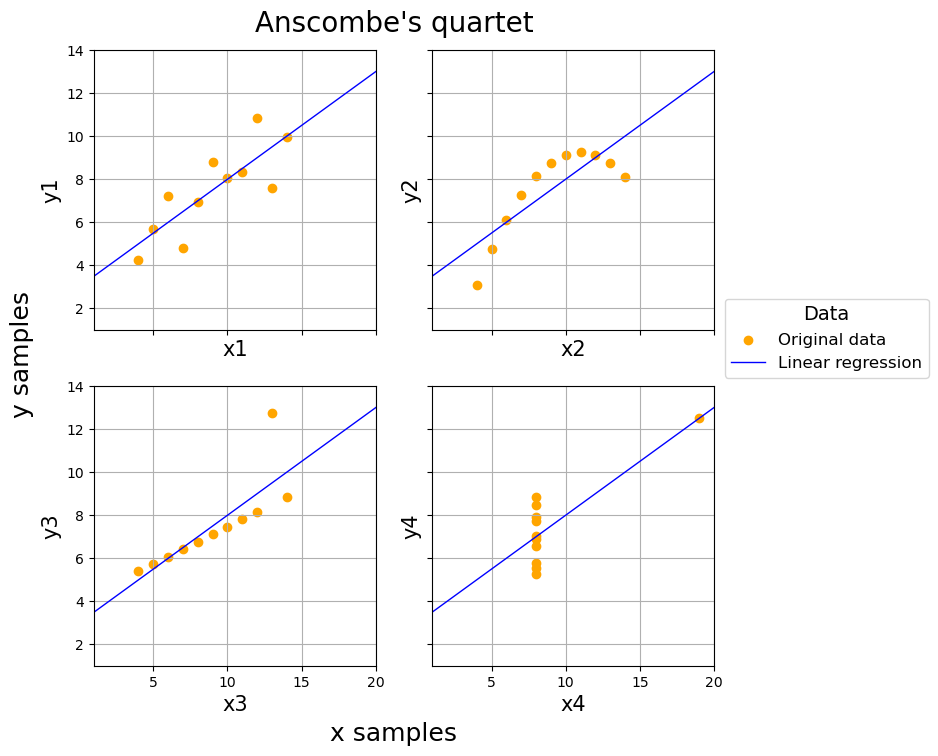

In [4]:
fig, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
fig.suptitle("Anscombe's quartet", fontsize=20, y=0.93)
fig.supxlabel("x samples", size=18)
fig.supylabel('y samples', size=18)
for i, ax in enumerate(axs.flat):
    i2 = i+1
    ax.grid()
    xcol, ycol = "x%d"%i2, "y%d"%i2
    ax.scatter(data[xcol], data[ycol], color='orange', label="Original data")
    ax.set_xlabel(f"x{i2}", fontsize=15)
    ax.set_ylabel(f"y{i2}", fontsize=15)
    ax.plot([3+0.5*i for i in range(22)], color='blue', linewidth=1, label="Linear regression")
plt.xlim(1,20)
plt.ylim(1,14)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='lower center', title="Data", 
           bbox_to_anchor=(1.4, 1), fontsize=12, title_fontsize =14) 
plt.show()

### Task 2) Analyze the dataset: [ans2.tsv]

In [5]:
data2 = pd.read_csv("data/ans2.tsv", sep="\t")
results2 = {}
acc ='to 2 decimal places'

results2['Mean of x'] = {
    "Value": round(data2['x'].mean(),2),
    "Accuracy": acc
}
results2['Mean of y'] = {
    "Value": round(data2['y'].mean(),2),
    "Accuracy": acc
}
results2['SD of x'] = {
    "Value": round(data2['x'].std(),2),
    "Accuracy": acc
}
results2['SD of y'] = {
    "Value": round(data2['y'].std(),2),
    "Accuracy": acc
}
results2['Corr'] = {
    "Value": round(data2['x'].corr(data2['y']),3),
    "Accuracy": "to 3 decimal places"
}

#table
table2 = pd.DataFrame.from_dict(results2, orient='index').reset_index()
table2.columns = ["Property", "Value", "Accuracy"]
table2


,Property,Value,Accuracy
0,Mean of x,54.270,to 2 decimal places
1,Mean of y,47.840,to 2 decimal places
2,SD of x,16.710,to 2 decimal places
3,SD of y,26.850,to 2 decimal places
4,Corr,-0.066,to 3 decimal places


Scatter plot for Task 2 (multiple subplots in single panel)

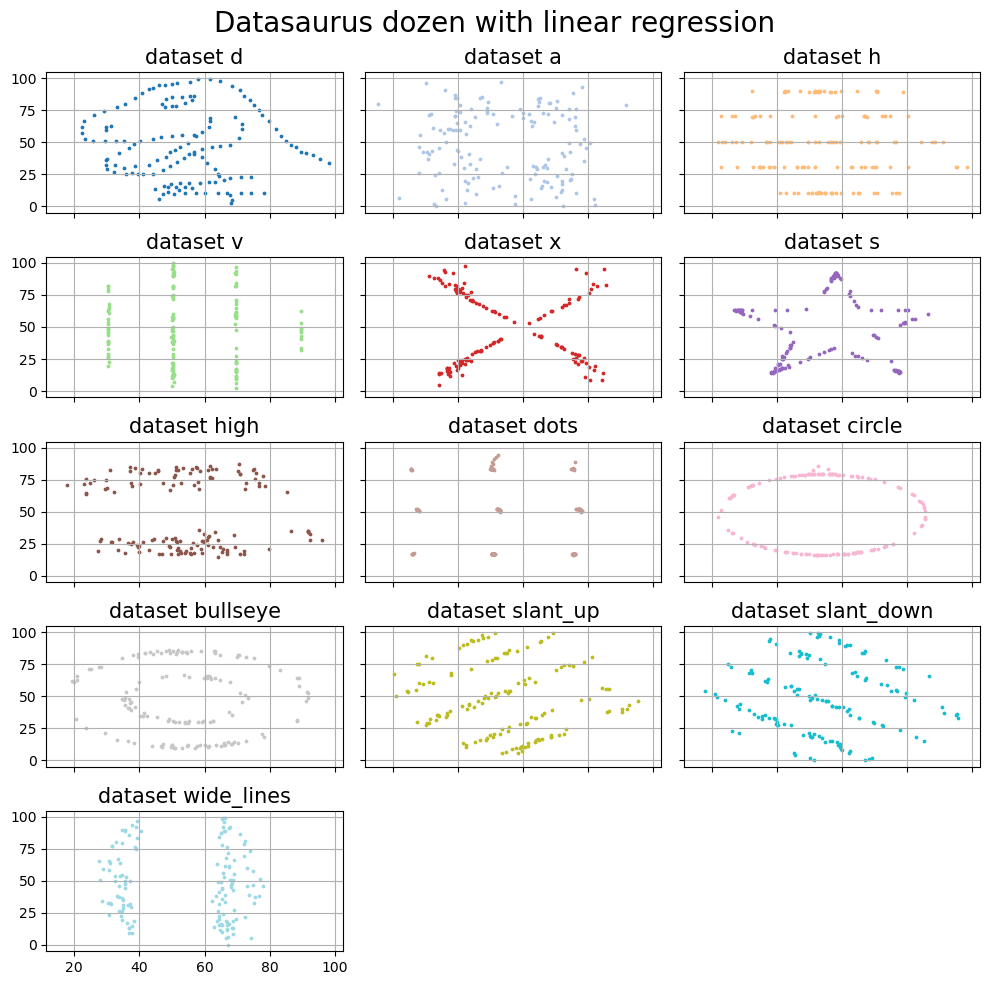

In [6]:
datasets = data2['dataset'].unique()

fig, axs = plt.subplots(5,3, figsize=(10,10), sharex=True, sharey=True)
fig.delaxes(axs[4][2])
fig.delaxes(axs[4][1])

colors = plt.cm.tab20(np.linspace(0, 1, len(datasets)))

for index, ax in enumerate(axs.flat):
    if index < len(datasets):
        ax.grid()
        dataset = datasets[index]
        data_new = data2[data2.dataset == dataset]
        ax.set_title("dataset "+dataset, fontsize=15)
        ax.scatter(data_new.x, data_new.y, color=colors[index], s=3)
        
        #linear regression
        # reg = linear_model.LinearRegression().fit(data_new.x.values.reshape(-1,1), data_new.y)
        # x_range = np.linspace(data_new.x.min(), data_new.x.max(), 100)
        # y_pred = reg.predict(x_range.reshape(-1,1))
        # ax.plot(x_range, y_pred, 'b-', linewidth=1)

plt.suptitle("Datasaurus dozen with linear regression", fontsize=20)
plt.tight_layout()

plt.show()

### What "d" and "s" stand for in given datasets of ans2.tsv?

d = dinosaur

s = star